In [1]:
import sys
import os
sys.path.append(os.path.abspath('./datasets'))

from datasets import data

Set random seed for future operations

In [2]:
def set_seed(seed: int = 42):
    import random
    import numpy as np

    # Python built-in RNG
    random.seed(seed)

    # NumPy RNG
    np.random.seed(seed)

    try:
        import torch
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        # Make CUDA deterministic
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    except ImportError:
        pass  # PyTorch not installed

    try:
        import tensorflow as tf
        tf.random.set_seed(seed)
    except ImportError:
        pass  # TensorFlow not installed

    print(f"[Seed set to {seed}]")

random_seed = 42
set_seed(random_seed)

[Seed set to 42]


In [3]:
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = data.get_data('downscaled_mnist_pca', arg1=2)

In [4]:
x_train_mnist_built, x_test_mnist_built, y_train_mnist_built, y_test_mnist_built = data.get_data('downscaled_mnist_pca', loading='build', arg1=2, random_state=random_seed)

In [5]:
print(x_train_mnist.shape)
print(x_train_mnist_built.shape)
print(x_test_mnist.shape)
print(x_test_mnist_built.shape)

(11552, 2)
(11552, 2)
(1902, 2)
(1902, 2)


In [12]:
x_train_hm, x_test_hm, y_train_hm, y_test_hm = data.get_data('hidden_manifold', arg1=2, arg2=6)

In [9]:
x_train_hm_built, x_test_hm_built, y_train_hm_built, y_test_hm_built = data.get_data('hidden_manifold', loading='build', arg1=2, arg2=6, random_state=random_seed)

In [10]:
print(x_train_hm.shape)
print(x_train_hm_built.shape)
print(x_test_hm.shape)
print(x_test_hm_built.shape)

(240, 2)
(240, 2)
(60, 2)
(60, 2)


In [11]:
x_train_tc, x_test_tc, y_train_tc, y_test_tc = data.get_data('two_curves', arg1=2, arg2=5)

In [14]:
x_train_tc_built, x_test_tc_built, y_train_tc_built, y_test_tc_built = data.get_data('two_curves', loading='build', arg1=2, arg2=5, random_state=random_seed)

In [15]:
print(x_train_tc.shape)
print(x_train_tc_built.shape)
print(x_test_tc.shape)
print(x_test_tc_built.shape)

(240, 2)
(240, 2)
(60, 2)
(60, 2)


In [12]:
print(y_train_mnist[:10])
print(y_train_mnist_built[:10])
print(y_train_hm[:10])
print(y_train_hm_built[:10])
print(y_train_tc[:10])
print(y_train_tc_built[:10])

[ 1 -1 -1  1 -1 -1 -1  1 -1  1]
[ 1 -1 -1  1 -1 -1 -1  1 -1  1]
[-1  1 -1  1  1  1  1  1 -1 -1]
[-1  1  1  1 -1  1  1  1 -1 -1]
[-1  1 -1  1  1  1  1  1 -1  1]
[ 1 -1 -1  1  1 -1 -1  1 -1  1]


In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

def visualize_2d_dataset(x_train, x_test, y_train, y_test, name):
    """
    Visualizes a 2D dataset with separate markers and colors for training and test sets.
    Assumes binary classification: label 0 vs label 1.

    Arguments:
        x_train, x_test: np.array or torch.Tensor of shape (N, 2)
        y_train, y_test: corresponding labels (0 or 1)
    """
    import numpy as np

    # Convert to numpy if using torch
    if hasattr(x_train, 'numpy'):
        x_train = x_train.detach().cpu().numpy()
        x_test = x_test.detach().cpu().numpy()
        y_train = y_train.detach().cpu().numpy()
        y_test = y_test.detach().cpu().numpy()

    plt.figure(figsize=(8, 6))

    # Define label names and colors
    labels = ['Label -1', 'Label 1']

    # Plot training data
    for i in [-1, 1]:
        if i == -1:
            color = 'blue'
            label = 'Label -1'
        else:
            color = 'red'
            label = 'Label 1'
        idx = (y_train == i)
        plt.scatter(x_train[idx, 0], x_train[idx, 1],
                    c=color, marker='o', alpha=0.7)

    # Plot test data
    for i in [-1, 1]:
        if i == -1:
            color = 'blue'
            label = 'Label -1'
        else:
            color = 'red'
            label = 'Label 1'
        idx = (y_test == i)
        plt.scatter(x_test[idx, 0], x_test[idx, 1],
                    c=color, marker='x', alpha=0.9)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'{name} dataset visualization')
    # Custom legend
    legend_elements = [
        mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                      markersize=8, label='Train'),
        mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                      markersize=8, label='Test'),
        mpatches.Patch(color='blue', label='Label -1'),
        mpatches.Patch(color='red', label='Label 1')
    ]
    plt.legend(handles=legend_elements, loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'./results/{name}_visu.png')
    plt.show()


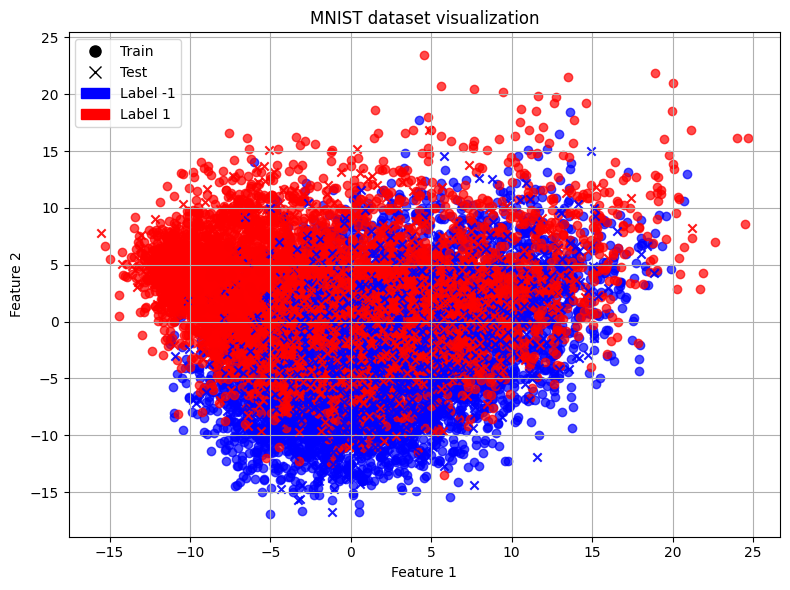

In [14]:
visualize_2d_dataset(x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist, 'MNIST')

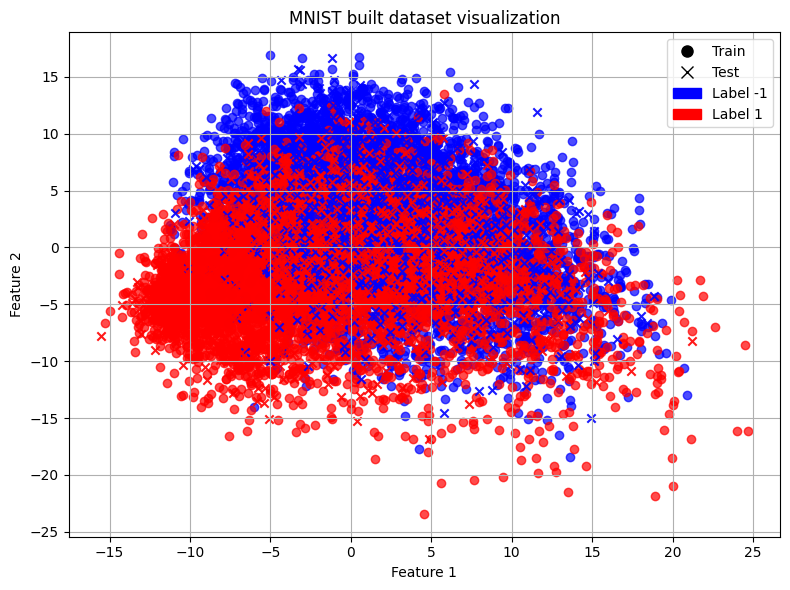

In [15]:
visualize_2d_dataset(x_train_mnist_built, x_test_mnist_built, y_train_mnist_built, y_test_mnist_built, 'MNIST built')

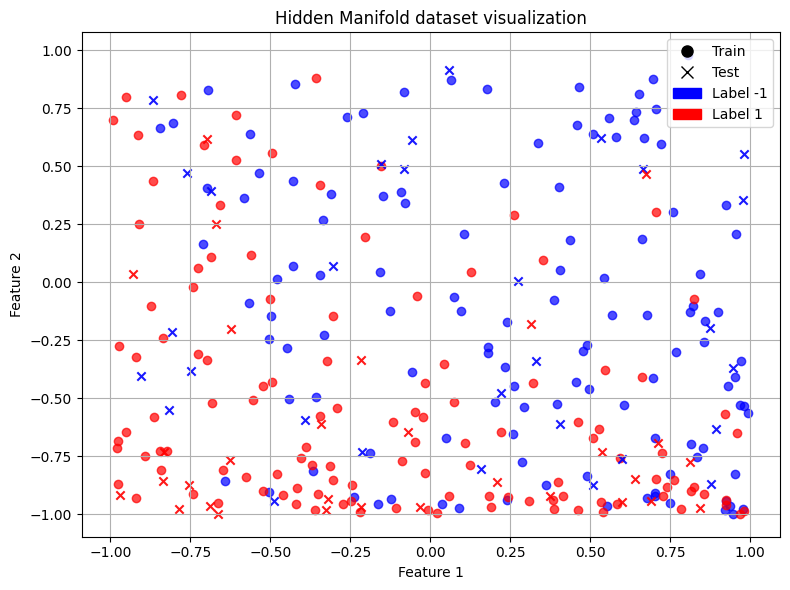

In [16]:
visualize_2d_dataset(x_train_hm, x_test_hm, y_train_hm, y_test_hm, 'Hidden Manifold')

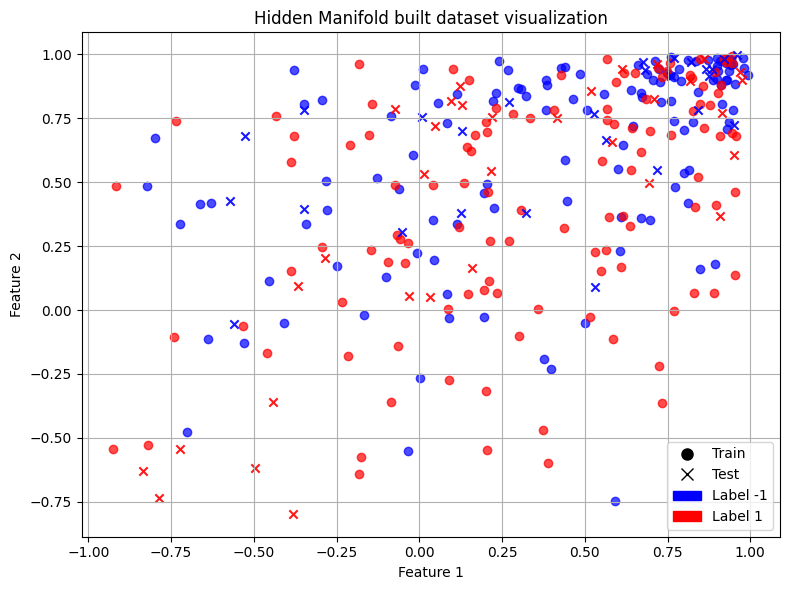

In [17]:
visualize_2d_dataset(x_train_hm_built, x_test_hm_built, y_train_hm_built, y_test_hm_built, 'Hidden Manifold built')

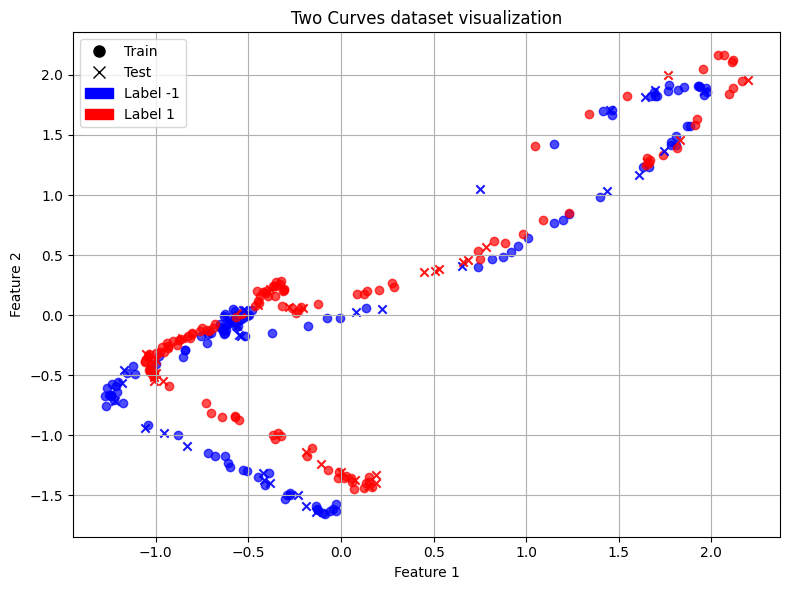

In [18]:
visualize_2d_dataset(x_train_tc, x_test_tc, y_train_tc, y_test_tc, 'Two Curves')

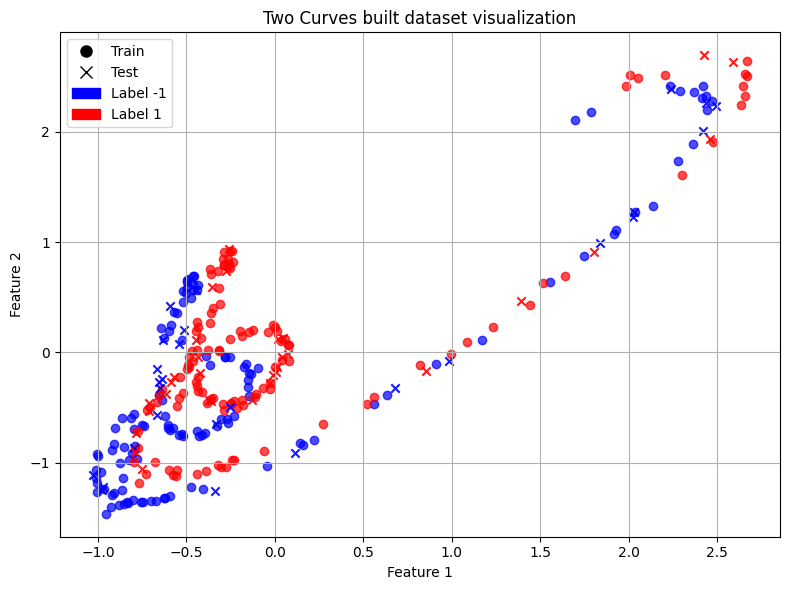

In [19]:
visualize_2d_dataset(x_train_tc_built, x_test_tc_built, y_train_tc_built, y_test_tc_built, 'Two Curves built')

Testing dataloaders

In [14]:
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = data.convert_array_to_tensor(x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist)

In [15]:
train_loader = data.convert_tensor_to_loader(x_train_mnist, y_train_mnist)

In [16]:
for batch_x, batch_y in train_loader:
    print(batch_x.shape)
    print(batch_y.shape)

torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
torch.Size([32, 2])
torch.Size([32])
t

Get summary

In [7]:
data.get_summary(x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist, 'datasets/summaries/', 'MNIST')

Dataset summary saved to datasets/summaries/MNIST_summary.txt


In [16]:
data.get_summary(x_train_hm, x_test_hm, y_train_hm, y_test_hm, 'datasets/summaries/', 'Hidden_Manifold')

Dataset summary saved to datasets/summaries/Hidden_Manifold_summary.txt


In [17]:
data.get_summary(x_train_tc, x_test_tc, y_train_tc, y_test_tc, 'datasets/summaries/', 'Two_Curves')

Dataset summary saved to datasets/summaries/Two_Curves_summary.txt
